### LT 3 Assignment 2 k-NN Classification

Deadline: September 26, Thursday, 11:59 PM

Find a data set (not discussed here) that can be classified to more than 75% accuracy using k-NN.

Create an iphython notebook organized as follows:

A. Problem 

B. Three Highlights of the Results (Should not exceed 80 characters per highlight)

C. Data Discussion 

D. k-NN Implementation

E. Discussion of Results

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import mglearn
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter


In [3]:
df_data = pd.read_csv("Dishonest.csv")
df_data = df_data.drop(['CT','CU'],axis=1)

In [4]:
df_data.head()

,LT,TC,TS
0,4,1,0
1,4,1,0
2,4,1,1
3,4,1,1
4,4,1,1


In [5]:
df_features=df_data.drop('TS', axis=1)
df_target = df_data['TS']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_target , 
                                                    test_size=0.25)


In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [7]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set score: 0.98


In [8]:
y_pred = knn.predict (X_test)
print("Test set predictions:\n {}".format(y_pred))
knn.score(X_test,y_test)

Test set predictions:
 [0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 1]


0.9753086419753086

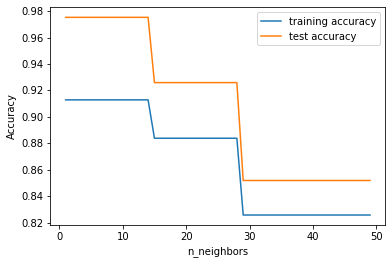

In [9]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


Population per class:      0
0   97
1  225

1.25 * Proportion Chance Criterion: 72.37616218510088%


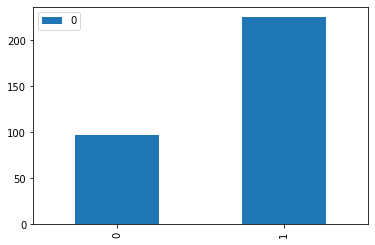

In [10]:
state_counts = Counter(df_data['TS'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

C:\Users\Cam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Cam\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


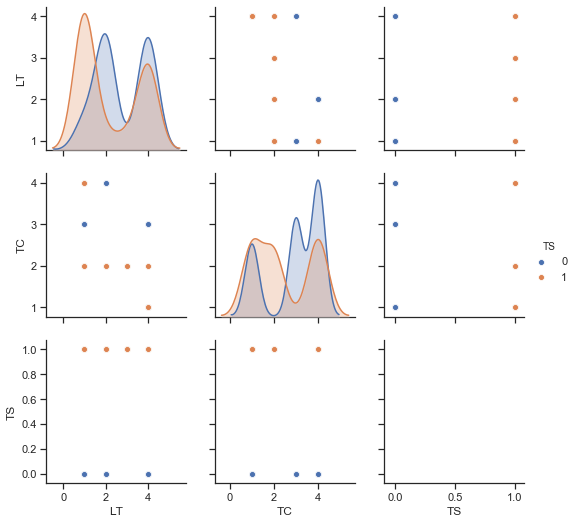

In [11]:
sns.set(style="ticks")

df = df_data
sns.pairplot(df, hue="TS")

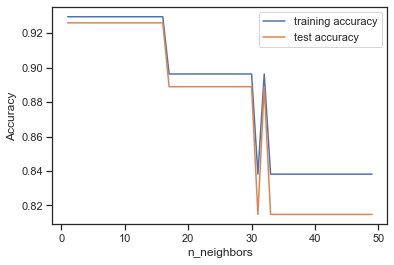

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_data['TS'], 
                                                    test_size=0.25,random_state=42)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

for n_neighbors in neighbors_settings:   
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

In [ ]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,500,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_data['TS'], 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 70) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


In [ ]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()